# [DataSet](https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression/)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
data = pd.read_csv("localdata/Section3/train.csv", sep=",")
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


C:\Tools\anaconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


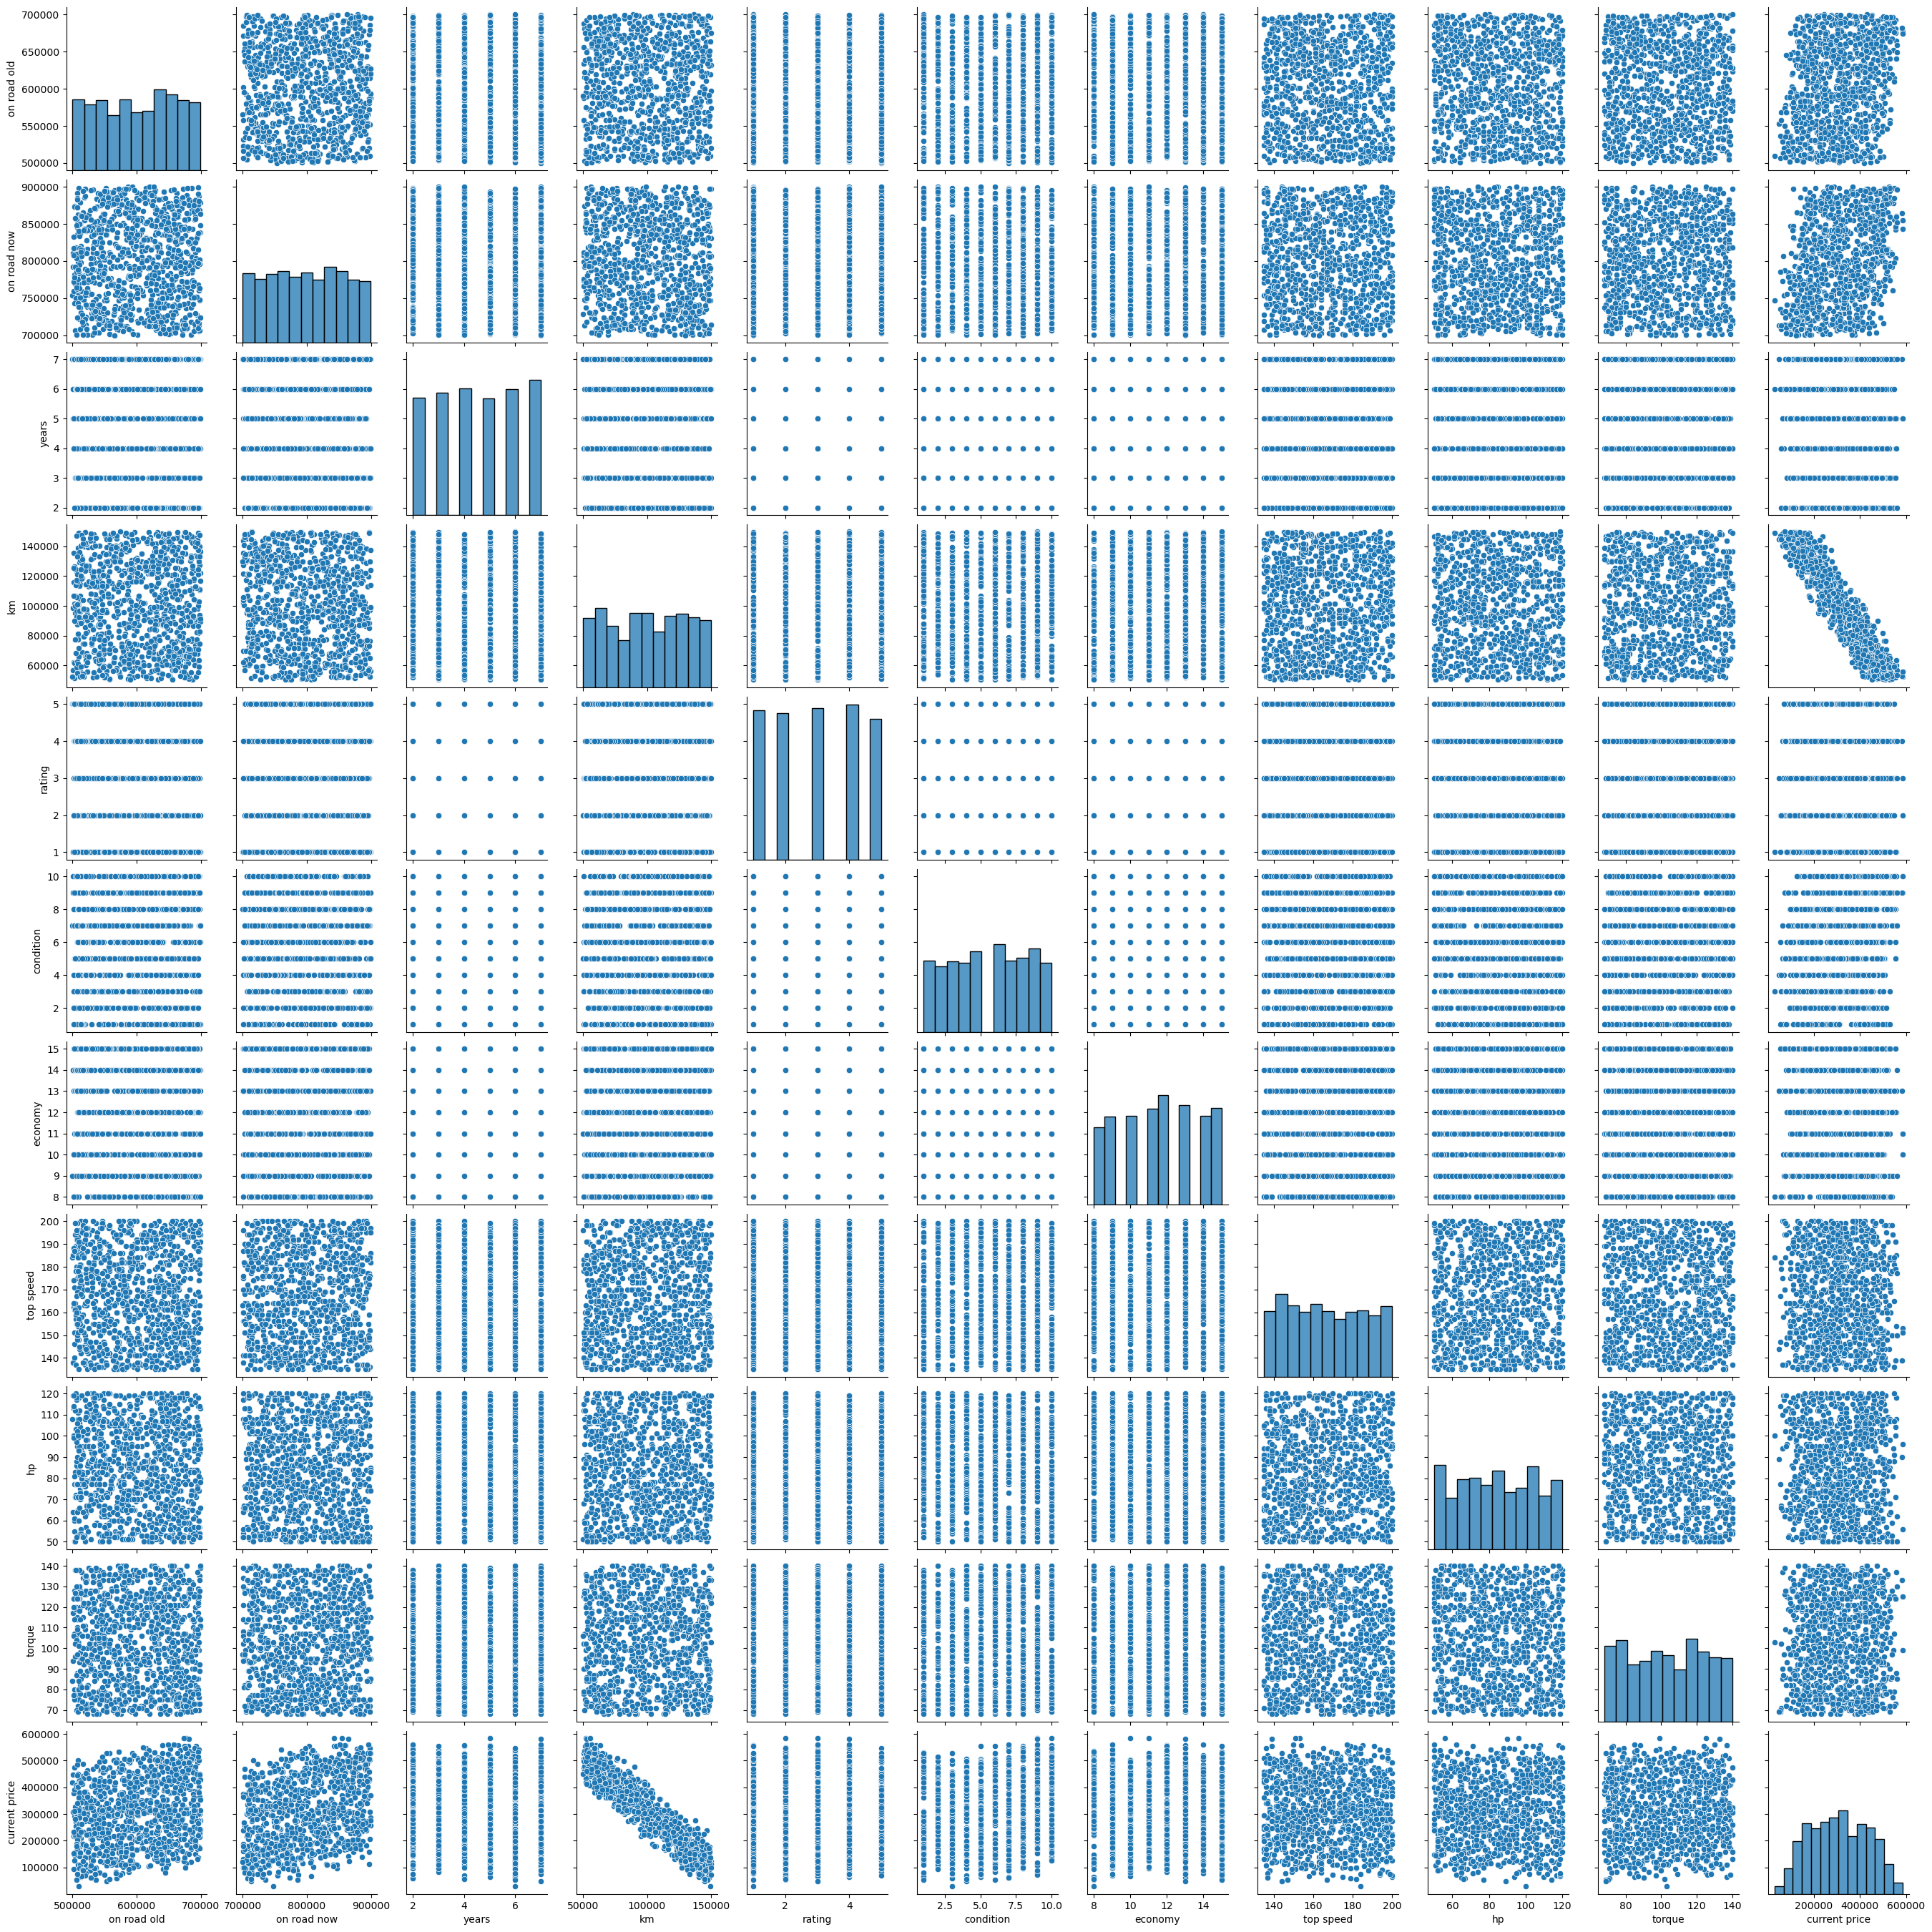

In [3]:
sns.pairplot(data[["on road old", "on road now", "years", "km", "rating", "condition", "economy", "top speed", "hp", "torque", "current price"]])

In [4]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
tensor_data.shape, tensor_data.dtype

(TensorShape([1000, 12]), tf.float32)

In [5]:
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

### Shuffle data : Remove ordering effect

In [6]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[6.550000e+02, 5.766230e+05, 8.762360e+05, ..., 6.800000e+01,
        7.000000e+01, 4.690845e+05],
       [8.420000e+02, 5.739390e+05, 7.140270e+05, ..., 1.190000e+02,
        1.390000e+02, 7.086200e+04],
       [7.460000e+02, 5.300560e+05, 7.228150e+05, ..., 7.700000e+01,
        7.100000e+01, 2.163020e+05],
       ...,
       [6.660000e+02, 6.357630e+05, 8.223260e+05, ..., 9.300000e+01,
        7.500000e+01, 2.069995e+05],
       [7.980000e+02, 6.671760e+05, 7.402000e+05, ..., 5.400000e+01,
        8.400000e+01, 3.802895e+05],
       [1.770000e+02, 6.646550e+05, 8.325320e+05, ..., 7.900000e+01,
        1.120000e+02, 2.430970e+05]], dtype=float32)>

In [7]:
X = tensor_data[:, 3:-1]
X.shape

TensorShape([1000, 8])

In [8]:
y = tensor_data[:, -1]
y.shape

TensorShape([1000])

In [9]:
y = tensor_data[:, -1:]
y.shape

TensorShape([1000, 1])

In [10]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=-1)
y.shape

TensorShape([1000, 1])

### Nomalization

#### mean, std를 주는 경우

In [ ]:
nomalizer = Normalization(mean= 5, variance = 4)
x_dummy = tf.constant([[3,4,5,6,7], [4,5,6,7,8], [5,6,7,8,9]])
nomalizer(x_dummy)

#### mean, std를 자동으로 계산 (column 단위로)

In [ ]:
nomalizer = Normalization()
x_dummy = tf.constant([[3,4,5,6,7], [4,5,6,7,8], [5,6,7,8,9]])
nomalizer.adapt(x_dummy)
nomalizer(x_dummy)

#### Data에 적용

In [11]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[-0.9084987 , -1.2192324 ,  1.435001  , ...,  0.4723863 ,
        -0.80685896, -1.587928  ],
       [ 0.8374946 ,  1.7033156 ,  0.7217798 , ...,  1.4060576 ,
         1.6801356 ,  1.6902642 ],
       [-1.4904965 ,  0.08053967,  0.00855871, ..., -1.1356031 ,
        -0.36797756, -1.540418  ],
       ...,
       [-0.9084987 ,  1.0387741 , -1.4178835 , ..., -0.40941432,
         0.41225603, -1.3503779 ],
       [ 0.8374946 , -0.6938321 , -0.7046624 , ..., -0.5131556 ,
        -1.4895633 , -0.9227876 ],
       [-0.9084987 ,  1.3392627 ,  1.435001  , ..., -0.87624997,
        -0.27044836,  0.40749335]], dtype=float32)>

# Linear Regression Model

In [19]:
model = tf.keras.Sequential([
    InputLayer(input_shape= (8)),
    normalizer,
    Dense(1),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  multiple                 17        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [12]:
model = tf.keras.Sequential()
model.add(normalizer)
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


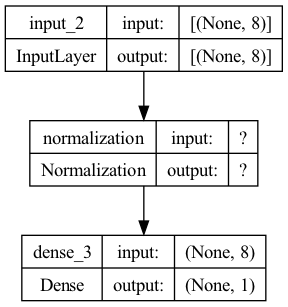

In [20]:
tf.keras.utils.plot_model(model, to_file="localdata/model.png", show_shapes=True)

In [40]:
model.compile(optimizer = Adam(learning_rate=0.2),
              loss = MeanAbsoluteError(),
               metrics=RootMeanSquaredError())

In [41]:
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
 1/32 [..............................] - ETA: 9s - loss: 315624.0000 - root_mean_squared_error: 337946.2500

2023-10-19 15:13:57.107030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 307547.6562 - root_mean_squared_error: 332361.0938
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 307541.2188 - root_mean_squared_error: 332355.1562
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 307534.9062 - root_mean_squared_error: 332349.2188
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 307528.4375 - root_mean_squared_error: 332343.4062
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 307522.0000 - root_mean_squared_error: 332337.4062
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 307515.6875 - root_mean_squared_error: 332331.4375
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 307509.2500 - root_mean_squared_error: 332325.3750
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 307502.9062 - root_mean_squared_error: 332319.3125
Epoch 9/100
32/32 [=

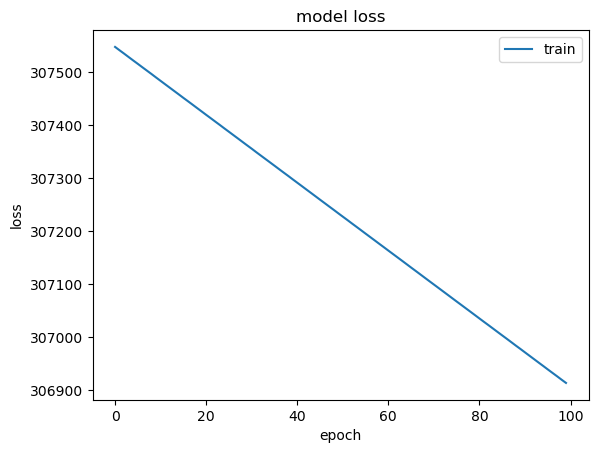

In [42]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

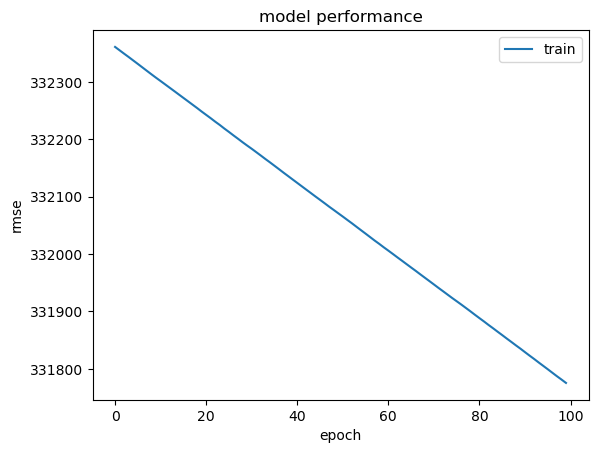

In [43]:
plt.plot(history.history['root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

### evaluate

In [44]:
model.evaluate(X, y) # output is loss, rmse

32/32 [==============================] - 0s 4ms/step - loss: 306910.7812 - root_mean_squared_error: 331772.0938


2023-10-19 15:15:55.218638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[306910.78125, 331772.09375]

# Validation and Testing

In [17]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [18]:
X_train = X[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]
print(X_train.shape, y_train.shape)

(800, 8) (800, 1)


In [19]:
X_val = X[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
y_val = y[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
print(X_val.shape, y_val.shape)

(100, 8) (100, 1)


In [20]:
X_test = X[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]
print(X_test.shape, y_test.shape)

(100, 8) (100, 1)


In [51]:
normalizer = Normalization()
normalizer.adapt(X_train)

2023-10-19 15:28:17.235791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-19 15:28:17.251518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [52]:
model = tf.keras.Sequential([
    InputLayer(input_shape= (8)),
    normalizer,
    Dense(1),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [53]:
model.compile(optimizer = Adam(learning_rate=1),
              loss = MeanAbsoluteError(),
               metrics=RootMeanSquaredError())

In [55]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
13/25 [==============>...............] - ETA: 0s - loss: 310077.2188 - root_mean_squared_error: 334466.0000

2023-10-19 15:30:33.060464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-19 15:30:33.251746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 8ms/step - loss: 308427.1250 - root_mean_squared_error: 332533.1250 - val_loss: 320785.4062 - val_root_mean_squared_error: 347870.3125
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 308401.6875 - root_mean_squared_error: 332509.8750 - val_loss: 320760.7500 - val_root_mean_squared_error: 347848.5938
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 308376.5625 - root_mean_squared_error: 332487.0625 - val_loss: 320735.9375 - val_root_mean_squared_error: 347826.2500
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 308351.7188 - root_mean_squared_error: 332464.1562 - val_loss: 320710.7188 - val_root_mean_squared_error: 347802.6562
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 308326.6250 - root_mean_squared_error: 332440.5312 - val_loss: 320686.1562 - val_root_mean_squared_error: 347780.0625
Epoch 6/100
25/25 [==============================] - 0s 5

Epoch 44/100
25/25 [==============================] - 0s 5ms/step - loss: 307351.7188 - root_mean_squared_error: 331536.0938 - val_loss: 319710.1250 - val_root_mean_squared_error: 346879.8125
Epoch 45/100
25/25 [==============================] - 0s 5ms/step - loss: 307326.6875 - root_mean_squared_error: 331512.7188 - val_loss: 319685.1250 - val_root_mean_squared_error: 346856.3750
Epoch 46/100
25/25 [==============================] - 0s 5ms/step - loss: 307301.9688 - root_mean_squared_error: 331489.8125 - val_loss: 319661.1250 - val_root_mean_squared_error: 346834.2500
Epoch 47/100
25/25 [==============================] - 0s 5ms/step - loss: 307276.6562 - root_mean_squared_error: 331466.2500 - val_loss: 319635.5000 - val_root_mean_squared_error: 346810.4688
Epoch 48/100
25/25 [==============================] - 0s 5ms/step - loss: 307251.7812 - root_mean_squared_error: 331443.2500 - val_loss: 319610.3125 - val_root_mean_squared_error: 346787.2500
Epoch 49/100
25/25 [====================

Epoch 87/100
25/25 [==============================] - 0s 5ms/step - loss: 306276.6250 - root_mean_squared_error: 330539.6875 - val_loss: 318635.7188 - val_root_mean_squared_error: 345890.1250
Epoch 88/100
25/25 [==============================] - 0s 5ms/step - loss: 306251.7188 - root_mean_squared_error: 330516.9688 - val_loss: 318610.7812 - val_root_mean_squared_error: 345867.0625
Epoch 89/100
25/25 [==============================] - 0s 5ms/step - loss: 306226.7500 - root_mean_squared_error: 330493.6875 - val_loss: 318585.4062 - val_root_mean_squared_error: 345844.0000
Epoch 90/100
25/25 [==============================] - 0s 5ms/step - loss: 306201.7500 - root_mean_squared_error: 330470.4375 - val_loss: 318560.5625 - val_root_mean_squared_error: 345820.3750
Epoch 91/100
25/25 [==============================] - 0s 5ms/step - loss: 306176.9062 - root_mean_squared_error: 330447.1562 - val_loss: 318535.9062 - val_root_mean_squared_error: 345797.9688
Epoch 92/100
25/25 [====================

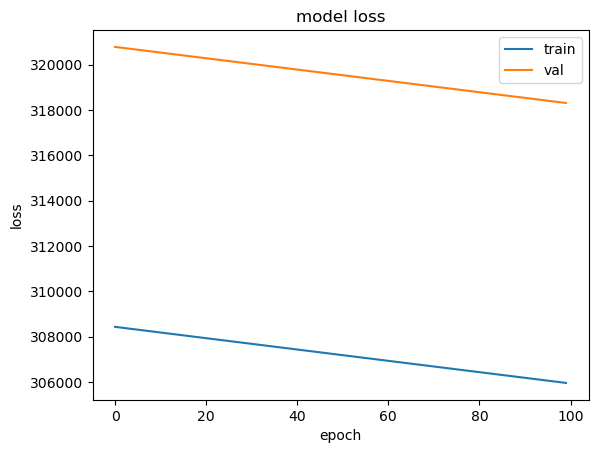

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

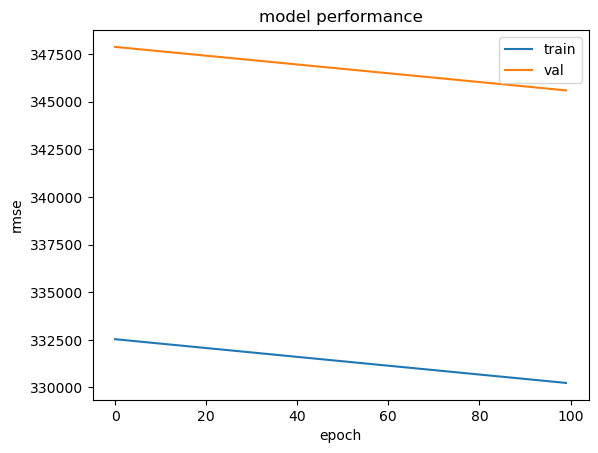

In [57]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [58]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 294384.4062 - root_mean_squared_error: 321609.2812


[294384.40625, 321609.28125]

### predict

In [66]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [67]:
y_pred.shape

(100, 1)

In [63]:
model.predict(tf.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 116ms/step


array([[2498.5308]], dtype=float32)

### Actual vs Predicted Prices

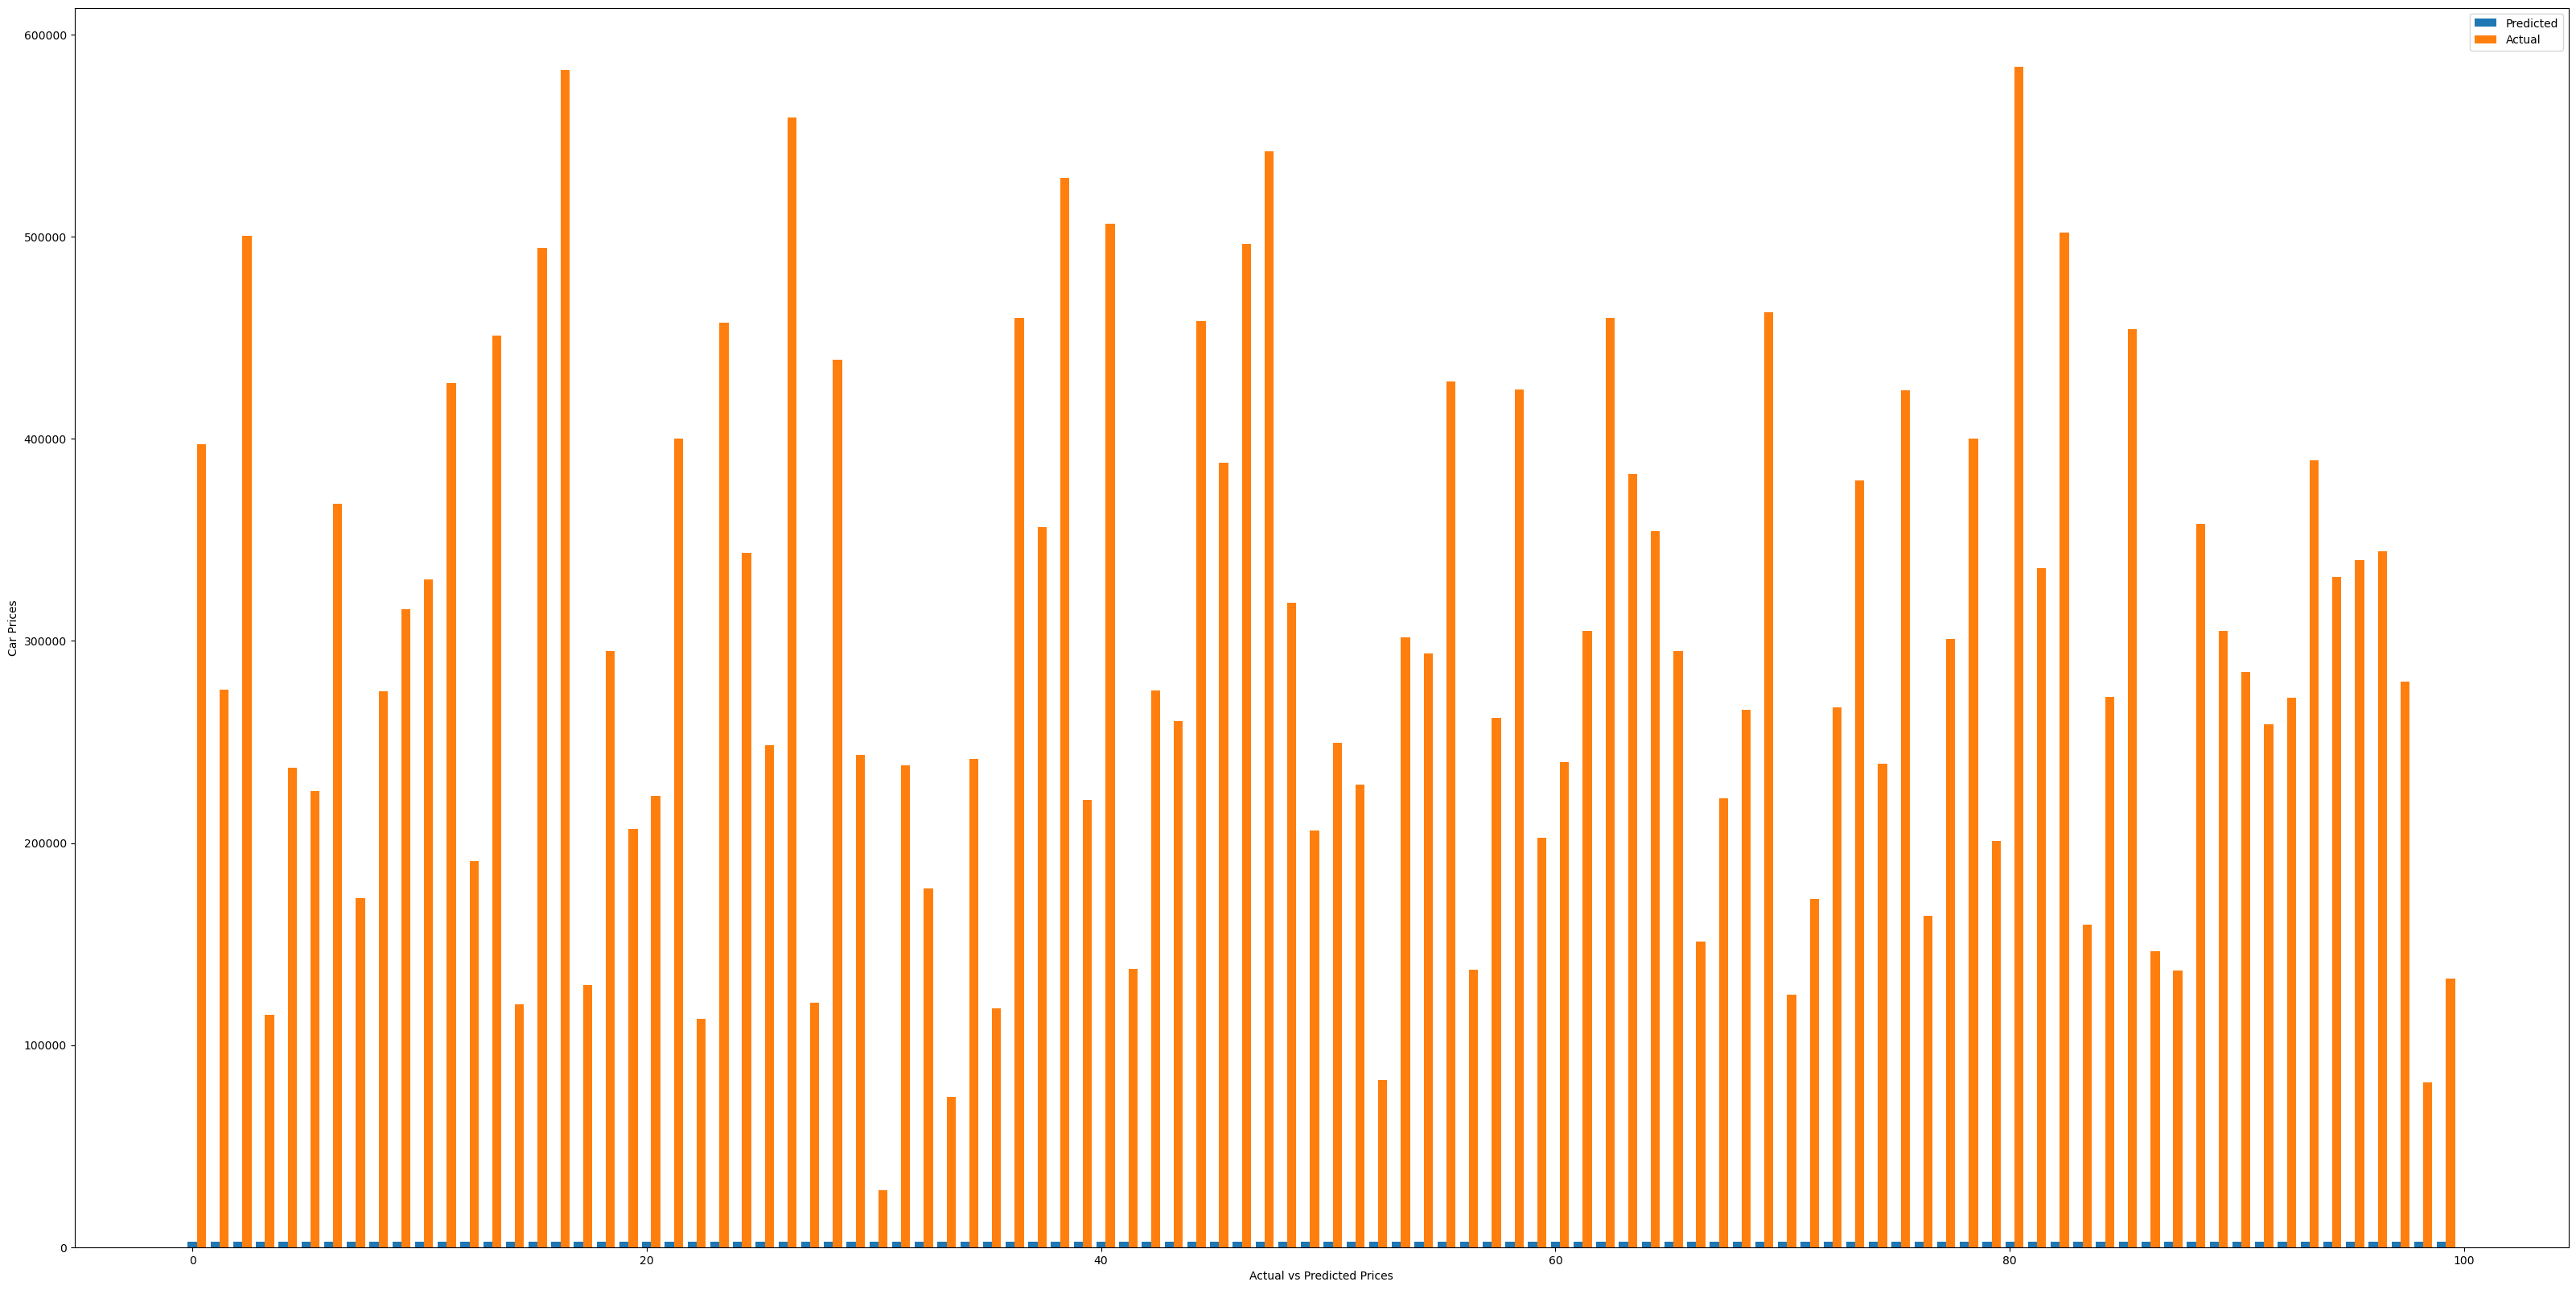

In [71]:
ind = np.arange(100)
plt.figure(figsize=(40, 20))

width = 0.4

plt.bar(ind, y_pred[:, 0], width, label='Predicted Price')
plt.bar(ind + width, y_test, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.legend(['Predicted', 'Actual'])

plt.show()

# Corrective Measures

In [12]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,450
Trainable params: 2,433
Non-trainable params: 17
_____________________________________________________

In [14]:
tf.keras.utils.plot_model(model, to_file="localdata/model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [15]:
model.compile(optimizer = Adam(learning_rate=0.1),
              loss = MeanAbsoluteError(),
               metrics=RootMeanSquaredError())

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 257476.5469 - root_mean_squared_error: 292076.2812 - val_loss: 121969.1875 - val_root_mean_squared_error: 149351.7812
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 65045.0156 - root_mean_squared_error: 84351.4844 - val_loss: 47259.7344 - val_root_mean_squared_error: 57966.1836
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 47461.4492 - root_mean_squared_error: 59833.3633 - val_loss: 42396.9141 - val_root_mean_squared_error: 50672.8945
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 41186.1875 - root_mean_squared_error: 50507.2695 - val_loss: 39730.5195 - val_root_mean_squared_error: 49039.5703
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 39485.0195 - root_mean_squared_error: 49018.4922 - val_loss: 42570.0547 - val_root_mean_squared_error: 51613.8438
Epoch 6/100
25/25 [==============================] - 0s 3ms/s

25/25 [==============================] - 0s 2ms/step - loss: 34383.7422 - root_mean_squared_error: 42925.7969 - val_loss: 35435.1992 - val_root_mean_squared_error: 43018.8711
Epoch 45/100
25/25 [==============================] - 0s 2ms/step - loss: 34895.7422 - root_mean_squared_error: 43166.8359 - val_loss: 36562.5508 - val_root_mean_squared_error: 44409.2344
Epoch 46/100
25/25 [==============================] - 0s 2ms/step - loss: 33655.1406 - root_mean_squared_error: 41903.4844 - val_loss: 39365.2773 - val_root_mean_squared_error: 47531.8555
Epoch 47/100
25/25 [==============================] - 0s 3ms/step - loss: 33827.2461 - root_mean_squared_error: 42204.9375 - val_loss: 38558.9062 - val_root_mean_squared_error: 46099.6328
Epoch 48/100
25/25 [==============================] - 0s 2ms/step - loss: 34251.4570 - root_mean_squared_error: 42695.8477 - val_loss: 39676.8203 - val_root_mean_squared_error: 47655.2695
Epoch 49/100
25/25 [==============================] - 0s 2ms/step - loss:

Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 33199.3516 - root_mean_squared_error: 41258.1914 - val_loss: 36183.2031 - val_root_mean_squared_error: 44107.9531
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 34307.8164 - root_mean_squared_error: 42669.8086 - val_loss: 35833.9961 - val_root_mean_squared_error: 44281.6211
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 34138.5234 - root_mean_squared_error: 42312.4688 - val_loss: 34590.7891 - val_root_mean_squared_error: 43062.5195
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 33462.1289 - root_mean_squared_error: 41761.5430 - val_loss: 42229.1484 - val_root_mean_squared_error: 50817.9961
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 34606.3164 - root_mean_squared_error: 43009.6523 - val_loss: 37665.7539 - val_root_mean_squared_error: 45245.5469
Epoch 93/100
25/25 [==============================] - 0s 2ms

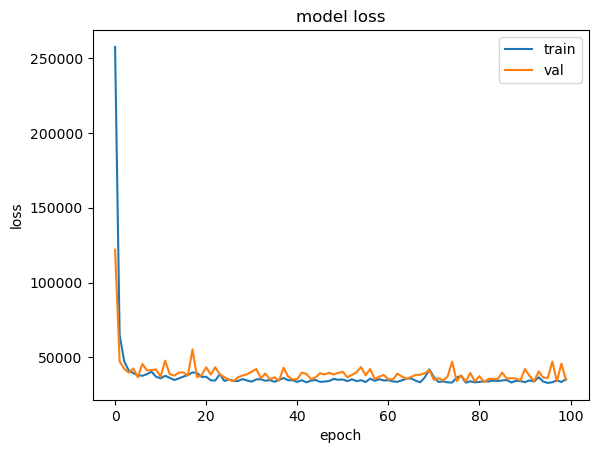

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

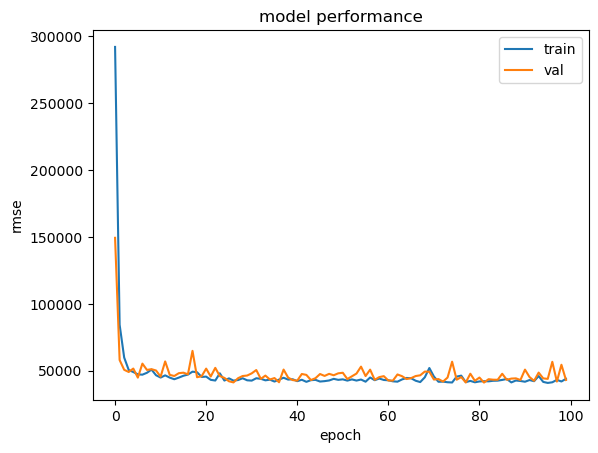

In [23]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [24]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 42855.9336 - root_mean_squared_error: 51292.6992


[42855.93359375, 51292.69921875]

In [25]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


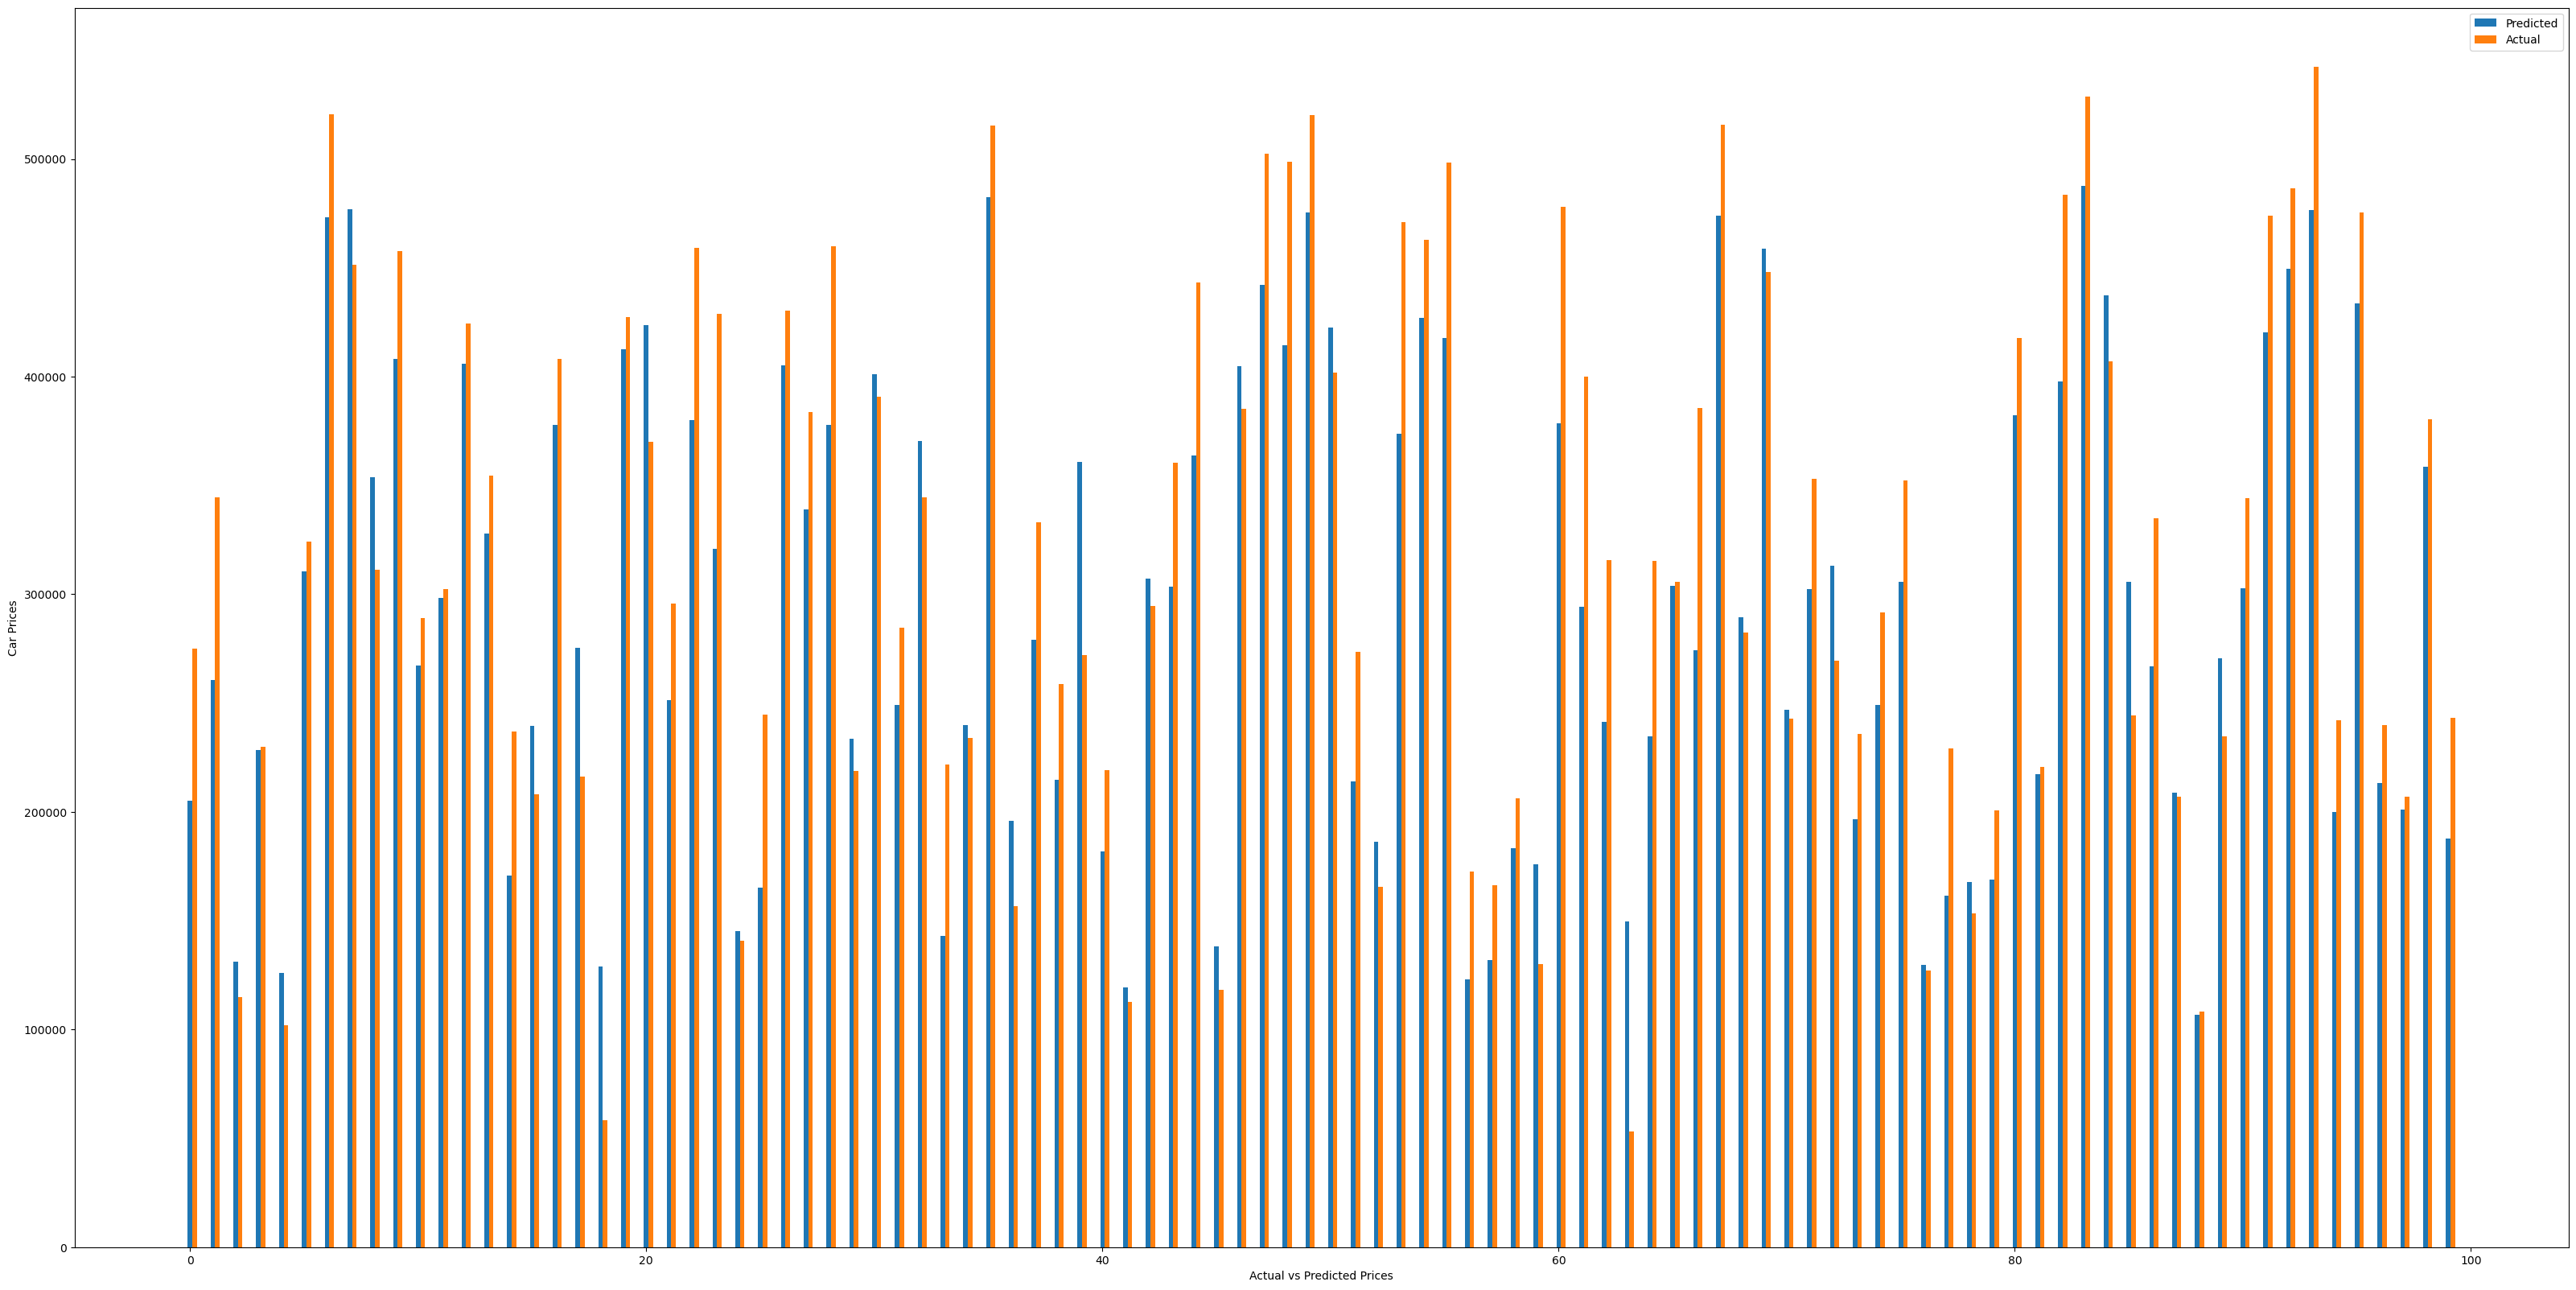

In [28]:
ind = np.arange(100)
plt.figure(figsize=(40, 20))

width = 0.2

plt.bar(ind, y_pred[:, 0], width, label='Predicted Price')
plt.bar(ind + width, y_test[:, 0], width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.legend(['Predicted', 'Actual'])

plt.show()

### Dataset API

In [83]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True) \
                    .batch(32)\
                    .prefetch(tf.data.AUTOTUNE)

In [85]:
for x, y in train_dataset:
    print(x, y)
    break

tf.Tensor(
[[5.00000e+00 7.81690e+04 2.00000e+00 9.00000e+00 8.00000e+00 1.81000e+02
  1.10000e+02 1.00000e+02]
 [4.00000e+00 1.06209e+05 3.00000e+00 1.00000e+00 1.20000e+01 1.84000e+02
  8.90000e+01 1.08000e+02]
 [6.00000e+00 1.29656e+05 5.00000e+00 9.00000e+00 1.30000e+01 1.86000e+02
  7.60000e+01 1.38000e+02]
 [4.00000e+00 1.05279e+05 4.00000e+00 9.00000e+00 1.00000e+01 1.58000e+02
  5.90000e+01 9.90000e+01]
 [6.00000e+00 6.02330e+04 4.00000e+00 4.00000e+00 1.20000e+01 1.73000e+02
  7.20000e+01 1.25000e+02]
 [2.00000e+00 1.22105e+05 5.00000e+00 3.00000e+00 1.30000e+01 1.47000e+02
  1.14000e+02 8.00000e+01]
 [5.00000e+00 6.63450e+04 4.00000e+00 8.00000e+00 1.20000e+01 1.85000e+02
  8.20000e+01 9.20000e+01]
 [7.00000e+00 7.43210e+04 2.00000e+00 2.00000e+00 1.20000e+01 1.92000e+02
  1.13000e+02 9.50000e+01]
 [7.00000e+00 6.63670e+04 5.00000e+00 4.00000e+00 1.50000e+01 1.47000e+02
  5.90000e+01 7.20000e+01]
 [3.00000e+00 1.11289e+05 2.00000e+00 1.00000e+00 1.20000e+01 1.53000e+02
  8.00

In [86]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True) \
                    .batch(32)\
                    .prefetch(tf.data.AUTOTUNE)

In [87]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size=8) \
                    .batch(32)\
                    .prefetch(tf.data.AUTOTUNE)

In [94]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 32)                288       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,450
Trainable params: 2,433
Non-trainable params: 17
___________________________________________________

In [95]:
model.compile(optimizer = Adam(learning_rate=0.1),
              loss = MeanAbsoluteError(),
               metrics=RootMeanSquaredError())

In [96]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
 9/25 [=========>....................] - ETA: 0s - loss: 307657.6875 - root_mean_squared_error: 333816.6250

2023-10-19 16:19:09.123294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 13ms/step - loss: 258268.1406 - root_mean_squared_error: 292693.9062 - val_loss: 132757.9219 - val_root_mean_squared_error: 164292.8594
Epoch 2/100
 9/25 [=========>....................] - ETA: 0s - loss: 98069.6250 - root_mean_squared_error: 126001.0547 

2023-10-19 16:19:09.449444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 7ms/step - loss: 69497.6797 - root_mean_squared_error: 92212.0703 - val_loss: 47681.7500 - val_root_mean_squared_error: 58849.1133
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 44024.5742 - root_mean_squared_error: 55266.8125 - val_loss: 41215.7109 - val_root_mean_squared_error: 50964.2031
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 42944.8047 - root_mean_squared_error: 54087.4844 - val_loss: 45574.5742 - val_root_mean_squared_error: 55847.1406
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 41294.8008 - root_mean_squared_error: 51370.7539 - val_loss: 41851.8789 - val_root_mean_squared_error: 51249.4258
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 38743.1562 - root_mean_squared_error: 48308.8984 - val_loss: 43670.9805 - val_root_mean_squared_error: 53310.3203
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 3926

Epoch 46/100
25/25 [==============================] - 0s 7ms/step - loss: 34590.0273 - root_mean_squared_error: 43829.1172 - val_loss: 36014.7148 - val_root_mean_squared_error: 44506.1094
Epoch 47/100
25/25 [==============================] - 0s 7ms/step - loss: 34715.9023 - root_mean_squared_error: 43880.8867 - val_loss: 35023.3398 - val_root_mean_squared_error: 43505.1758
Epoch 48/100
25/25 [==============================] - 0s 7ms/step - loss: 34089.1602 - root_mean_squared_error: 43090.6484 - val_loss: 35486.8633 - val_root_mean_squared_error: 43986.2188
Epoch 49/100
25/25 [==============================] - 0s 7ms/step - loss: 33591.0391 - root_mean_squared_error: 42271.8086 - val_loss: 33768.0547 - val_root_mean_squared_error: 42113.7695
Epoch 50/100
25/25 [==============================] - 0s 7ms/step - loss: 33641.9453 - root_mean_squared_error: 42325.8750 - val_loss: 34260.8711 - val_root_mean_squared_error: 42566.4570
Epoch 51/100
25/25 [==============================] - 0s 7ms

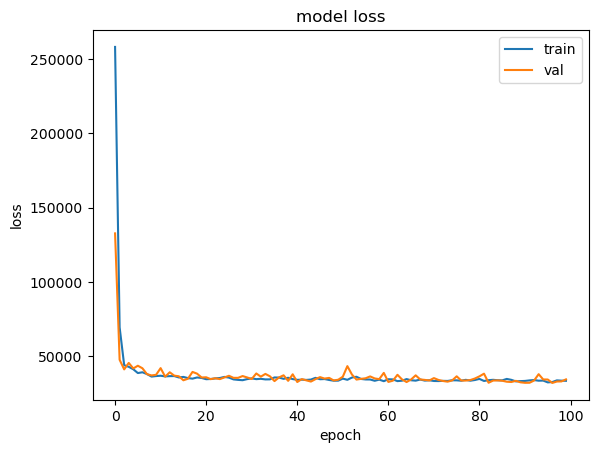

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

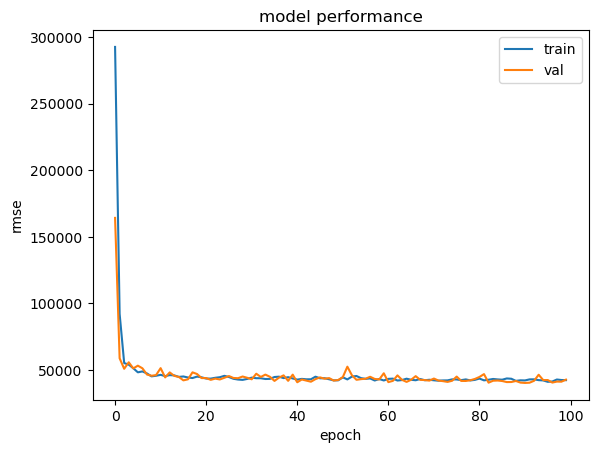

In [98]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [99]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 15ms/step - loss: 40979.2891 - root_mean_squared_error: 51408.0430


2023-10-19 16:20:10.782975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[40979.2890625, 51408.04296875]

In [100]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 9ms/step


2023-10-19 16:20:25.946806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


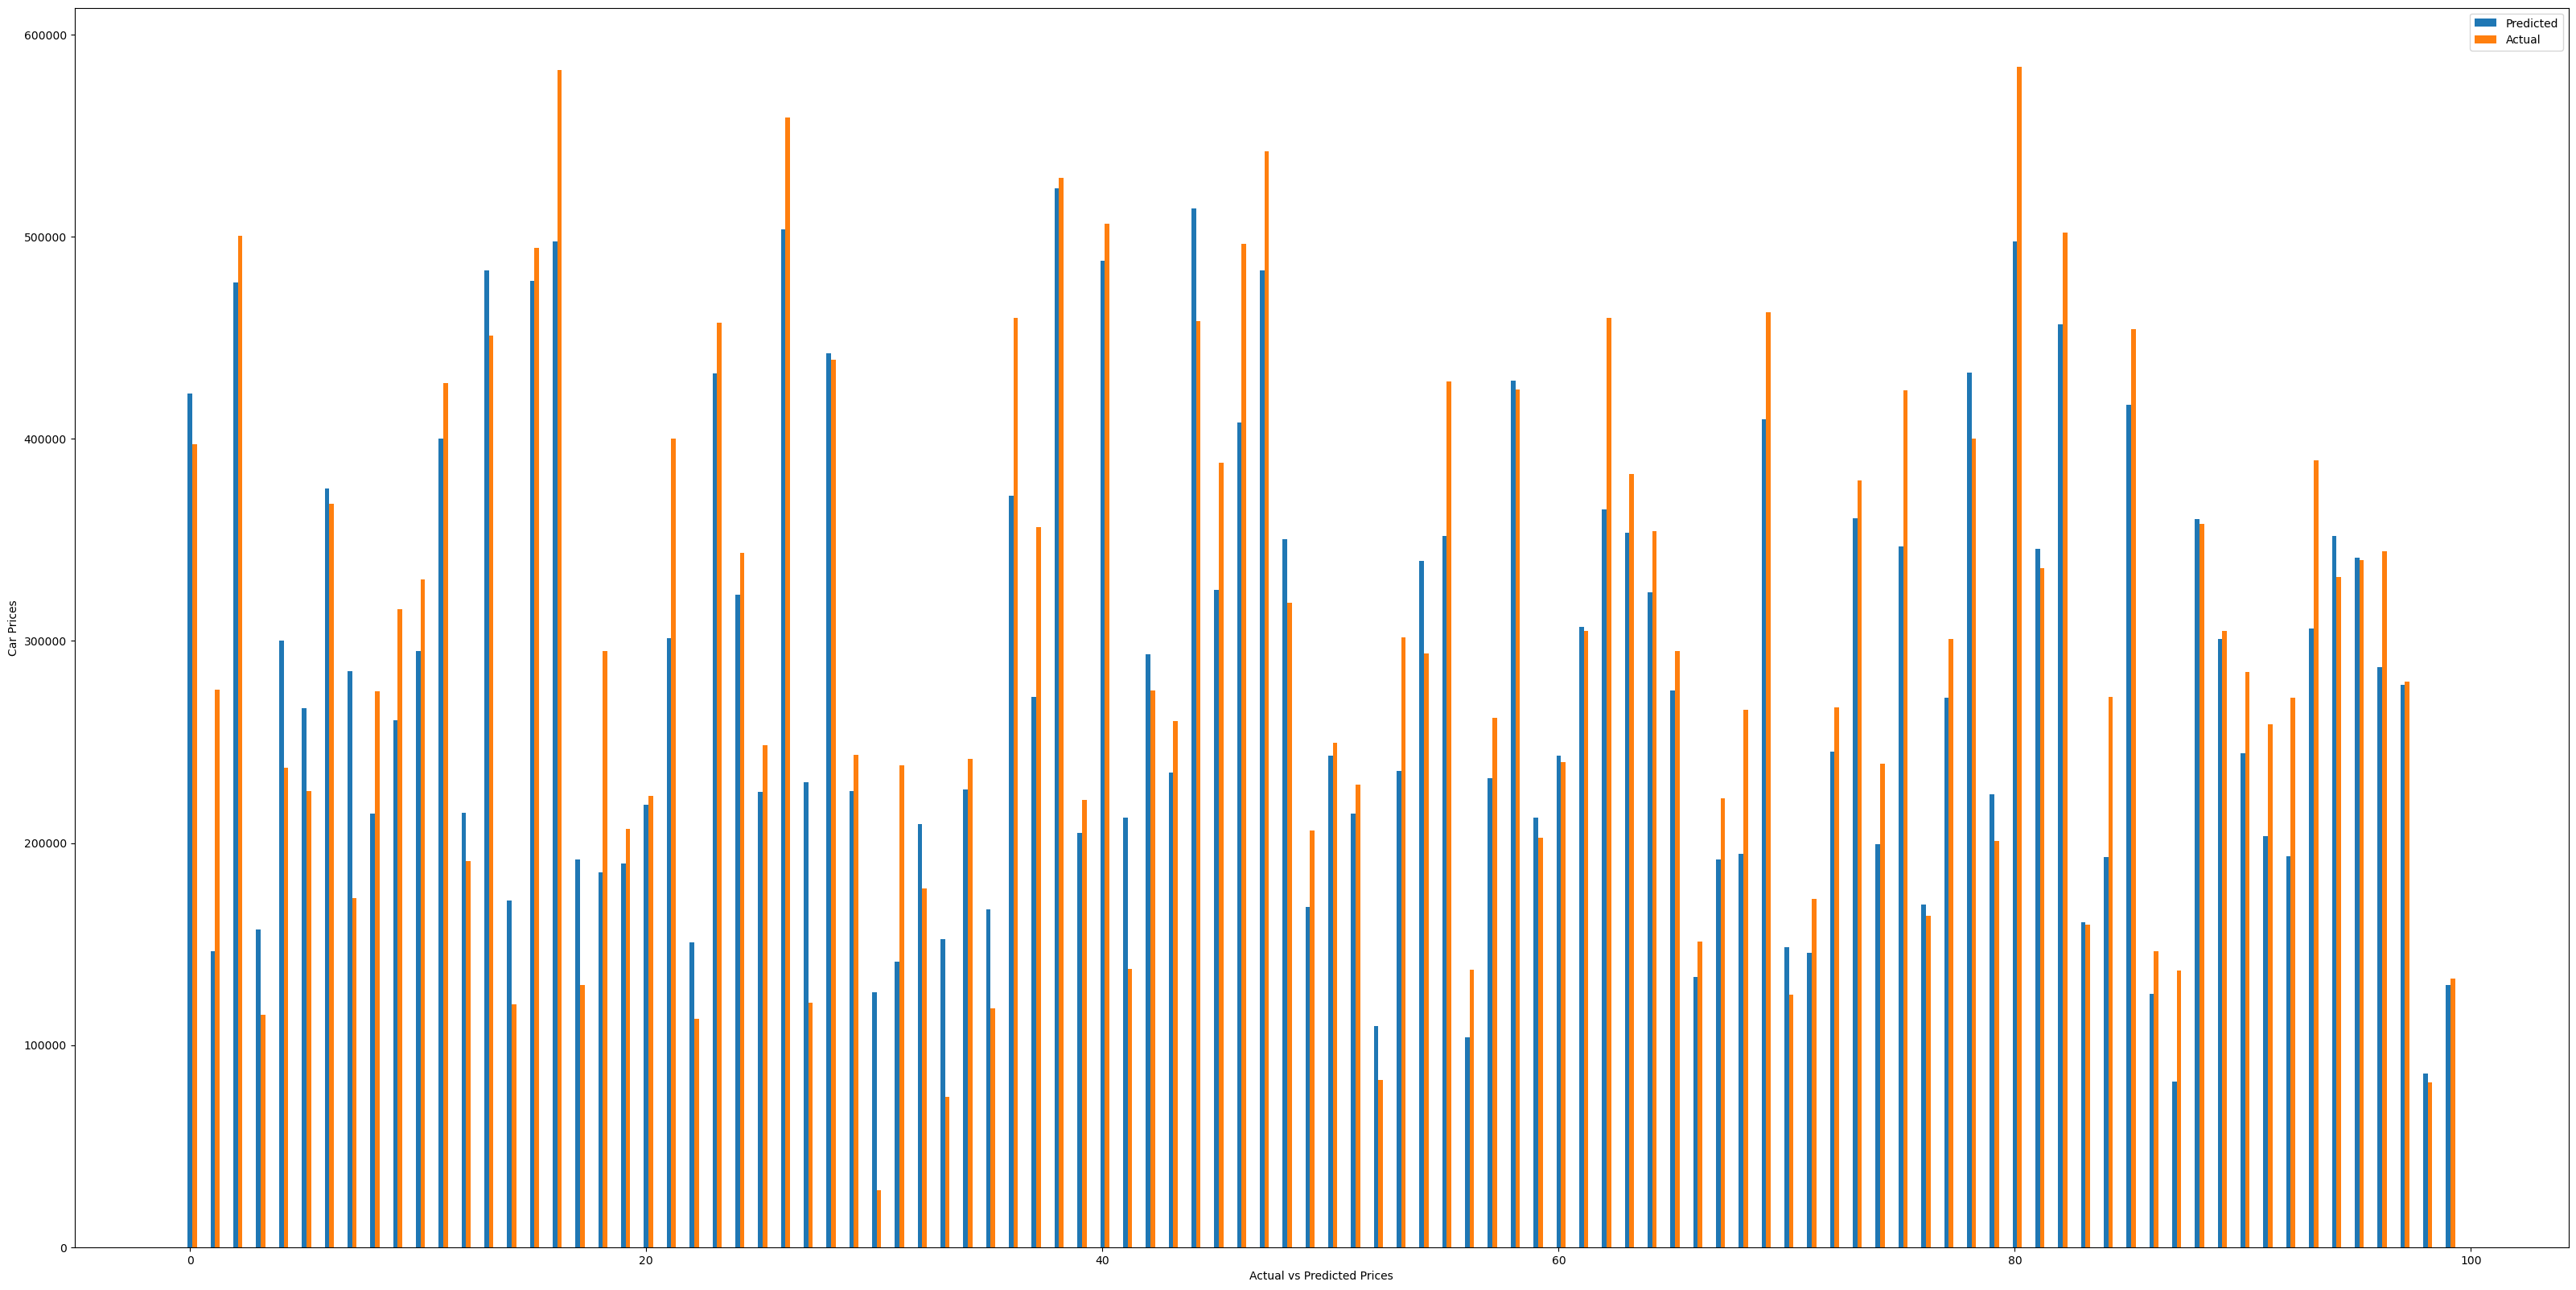

In [101]:
ind = np.arange(100)
plt.figure(figsize=(40, 20))

width = 0.2

plt.bar(ind, y_pred[:, 0], width, label='Predicted Price')
plt.bar(ind + width, y_test, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.legend(['Predicted', 'Actual'])

plt.show()